In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv('stats.ar1.csv')

In [6]:
df

,n,i,m,leaves_fernau,leaves_brute,leaves_approx,time_fernau,time_brute,time_approx
0,18,1,48,14,14,12,55,4,727
1,18,2,52,15,15,14,24,2,721
2,18,3,50,14,14,13,26,4,662
3,18,4,44,14,14,11,26,3,662
4,18,5,37,13,13,12,12,6,662
...,...,...,...,...,...,...,...,...,...
190,30,11,50,21,21,18,509,2397,536
191,30,12,30,14,14,,4,72332,549
192,30,13,42,17,17,14,188,37257,531
193,30,14,40,20,20,19,24,5347,557


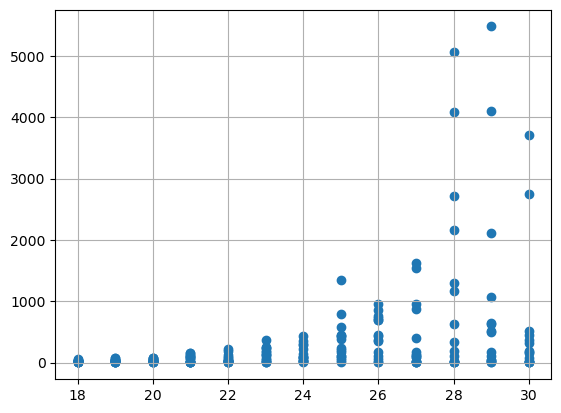

In [7]:
plt.scatter(df['n'], df['time_fernau'])
plt.grid(True)

In [39]:
df['no_vertices'] = df['n']

In [40]:
# aggregate df based on values of n
df_agg = df.groupby('no_vertices').mean()

In [18]:
w = -2

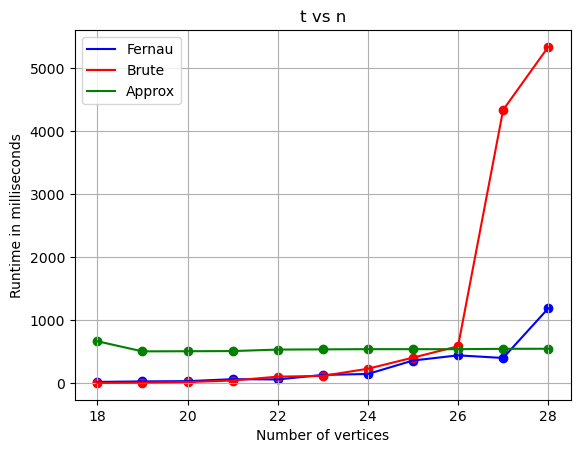

In [28]:
plt.plot(df_agg['n'][:w], df_agg['time_fernau'][:w], c='b', label='Fernau')
plt.plot(df_agg['n'][:w], df_agg['time_brute'][:w], c='r', label='Brute')
plt.plot(df_agg['n'][:w], df_agg['time_approx'][:w], c='g', label='Approx')
plt.scatter(df_agg['n'][:w], df_agg['time_fernau'][:w], c='b')
plt.scatter(df_agg['n'][:w], df_agg['time_brute'][:w], c='r')
plt.scatter(df_agg['n'][:w], df_agg['time_approx'][:w], c='g')
plt.grid(True)
plt.legend()
plt.xlabel("Number of vertices")
plt.ylabel("Runtime in milliseconds")
plt.title("t vs n")
plt.savefig("tvsn.pdf")

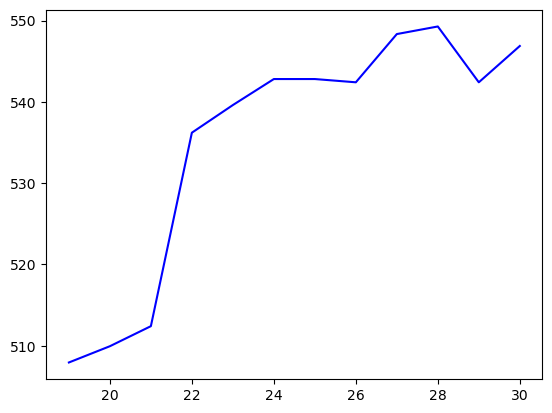

In [12]:
plt.plot(df_agg['n'][1:], df_agg['time_approx'][1:], c='b', label='approx')

In [37]:
df_agg = pd.DataFrame(df_agg)

In [38]:
df_agg.keys()

Index(['n', 'i', 'm', 'leaves_fernau', 'leaves_brute', 'time_fernau',
       'time_brute', 'time_approx'],
      dtype='object')

In [10]:
# import plotnine

In [11]:
from plotnine import *

In [67]:
df = pd.read_csv('stats.ar1.csv')

# drop from df if df['n'] is greater than 28
# df = df[df['n'] <= 25]

In [68]:
import plotly.graph_objects as go

In [69]:
fig = go.Figure()

In [70]:
for i in ['time_fernau', 'time_brute']:
    fig.add_trace(
        go.Box(
            x=df['n'][:-5],y=df[i][:-5],name=i,boxmean=True
        )
    )

fig.update_layout(yaxis_title='', boxmode='group', title="def", xaxis_title='Loss/Dup Ratio')
# limit y to 60000
fig.update_yaxes(range=[0, 5000])

fig.show()
# fig.write_image("figs2/" + mc + "/dup_" + dup + ".png")


In [45]:
fig.show()

In [20]:
df_30 = df[df['n'] == 30]

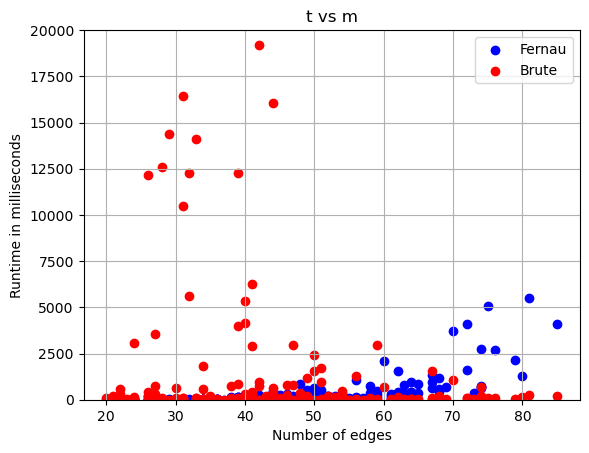

In [27]:
#plt.plot(df_30['m'], df_30['time_fernau'], c='b', label='Fernau')
#plt.plot(df_30['m'], df_30['time_brute'], c='r', label='Brute')
plt.scatter(df['m'], df['time_fernau'], c='b', label='Fernau')
plt.scatter(df['m'], df['time_brute'], c='r', label='Brute')
plt.grid(True)
plt.ylim(0, 20000)
plt.legend()
plt.xlabel("Number of edges")
plt.ylabel("Runtime in milliseconds")
plt.title("t vs m")
plt.savefig("tvsm.pdf")

In [34]:
df["approx_ratio"] = df["leaves_fernau"] / df["leaves_approx"]

In [33]:
# make leaves_approx int
df["leaves_approx"] = df["leaves_approx"].replace(' ', 0).astype(int)

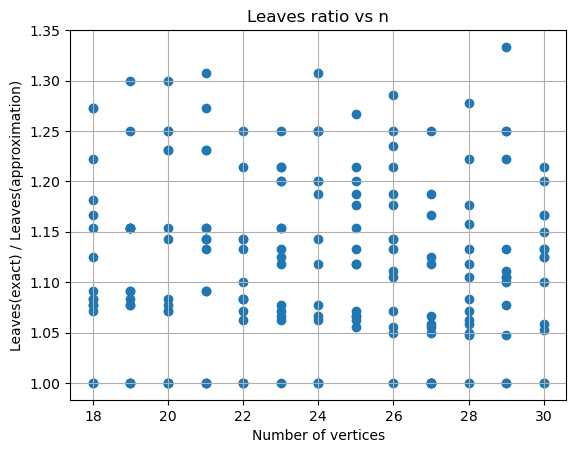

In [48]:
plt.scatter(df['n'], df['approx_ratio'])
# plt.plot(df_agg['n'], df_agg['approx_ratio'])
plt.grid(True)
plt.xlabel("Number of vertices")
plt.ylabel("Leaves(exact) / Leaves(approximation)")
plt.title("Leaves ratio vs n")
plt.savefig("leaves_ratio_vs_n.pdf")

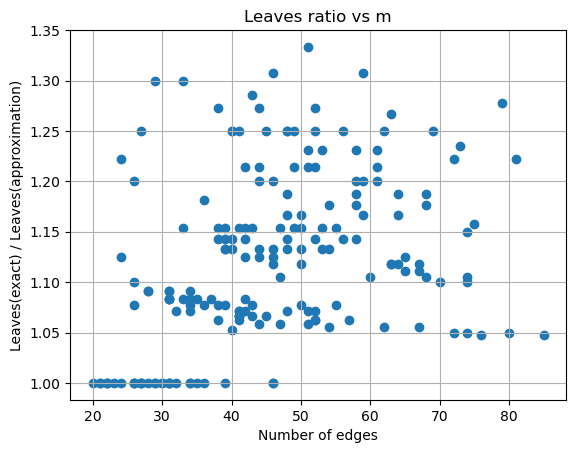

In [49]:
plt.scatter(df['m'], df['approx_ratio'])
plt.grid(True)
plt.xlabel("Number of edges")
plt.ylabel("Leaves(exact) / Leaves(approximation)")
plt.title("Leaves ratio vs m")
plt.savefig("leaves_ratio_vs_m.pdf")

In [45]:
df_agg['approx_ratio']

no_vertices
18    1.125191
19         NaN
20    1.124090
21         NaN
22         NaN
23    1.135984
24    1.140786
25         NaN
26    1.144111
27         NaN
28         NaN
29         NaN
30         NaN
Name: approx_ratio, dtype: float64